In [21]:
from random import *  
from math import sqrt  
import numpy as np
from numpy.random import uniform
import scipy.stats as st
import matplotlib.pyplot as plt
import math
from scipy.stats import uniform, expon, gaussian_kde
import random

### Q1) MCMC

In [2]:
def pi(arr):
    if len(arr)==1:
        return arr[0]
    else:
        a=arr[-1]
        result=a*pi(arr[:-1])
        return result

In [3]:
xseq1=[1,1.1,1.3,1.4,1.8,2,1.6,1.7,1.9,0.5]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
xseq2=[1.32,1.56,0.7,1.2,1.4,1.3,1.78,1.6,1.23,2]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
x1history1=[]; # x1 sampling history of way1
x1history2=[]; # x1 sampling history of way2
pixhistory1=[]; # pix sampling history of way1
pixhistory2=[]; #pix sampling history of way2

In [4]:
pi(xseq1)

18.623404800000003

In [5]:
pi(xseq2)

22.0558751981568

In [6]:
np.random.exponential(1, 10)

array([0.82151894, 0.70018829, 0.54315935, 0.15812387, 1.2417675 ,
       2.09369668, 1.08832185, 3.18186722, 0.61259206, 0.44427654])

In [7]:
#way 1
for i in range(10000):
    for j in range(10):
        xjcandidate=np.random.exponential(1); #xj 를 exp 에서 후보 뽑기
        xseqcandidate=xseq1; #x(j-1) 까지 업데이트 되었던 xseq 가져오기
        xseqcandidate[j]=xjcandidate; #[x1,x2,,,,xj,,,,x10] 후보 새롭게 구성
        if pi(xseqcandidate)>20: #새롭게 구성한 [x1,x2,,,,xj,,,,x10] pi 값 확인
            xseq1=xseqcandidate; #20이 넘는다면 후보를 accept
        else:
            while pi(xseqcandidate)>20: #pi 가 20이 안 넘으면 넘을때까지...
                xjcandidate=np.random.exponential(1);
                xseqcandidate[j]=xjcandidate;
            xseq1=xseqcandidate; #넘었으니 accept
    x1history1.append(xseq1[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory1.append(pi(xseq1)); #pi x sampling 모으기

In [8]:
#way 2
for k in range(10000):
    for l in range(10):
        xother=xseq2[:l]+xseq2[l+1:];
        piother=pi(xother); #xl 빼고 나머지 값들의 곱
        minimum=20/piother; #xl 이 가질수 있는 최솟값
        xseq2[l]=st.expon.rvs(minimum) # st.expon.rvs(a) = random sampling of f(x)=exp(-(x-a)), x>=a
    x1history2.append(xseq2[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory2.append(pi(xseq2)); #pi x sampling 모으기

In [9]:
x1history1=x1history1[:9500];
pixhistory1=pixhistory1[:9500];
x1history2=x1history2[:9500];
pixhistory2=pixhistory2[:9500];

In [10]:
xaxis=[];
for k in range(9500):
    xaxis.append(k+1)

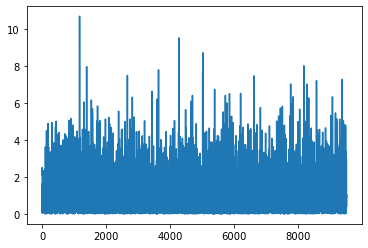

In [11]:
plt.plot(xaxis,x1history1);

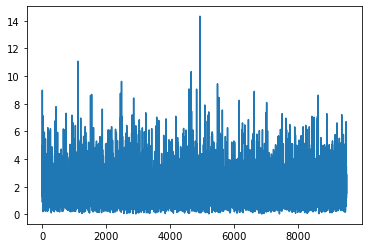

In [12]:
plt.plot(xaxis,x1history2);

1.0103353886770121


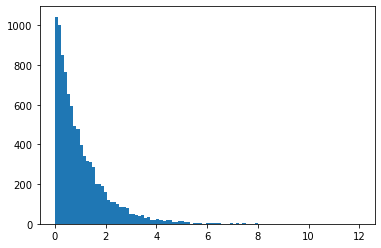

In [13]:
mean1=sum(x1history1)/len(x1history1)
print(mean1)
xaxis=np.linspace(0,12,100)
plt.hist(x1history1, bins=xaxis);

1.9375345929894037


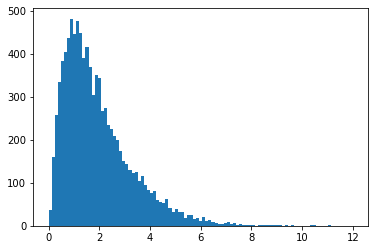

In [14]:
mean2=sum(x1history2)/len(x1history2)
print(mean2)
plt.hist(x1history2, bins=xaxis);

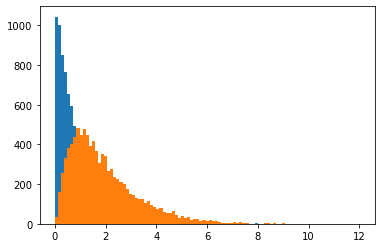

In [15]:
plt.hist(x1history1, bins=xaxis);
plt.hist(x1history2, bins=xaxis);

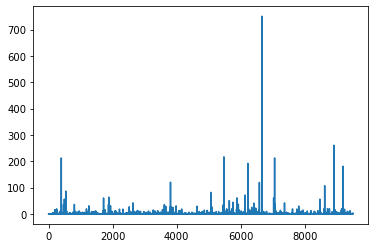

In [16]:
plt.plot(pixhistory1);

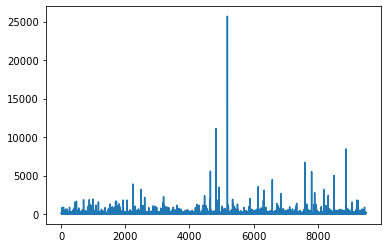

In [17]:
plt.plot(pixhistory2);

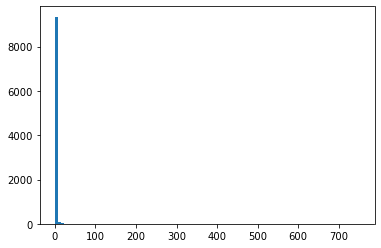

In [18]:
plt.hist(pixhistory1, bins=100);

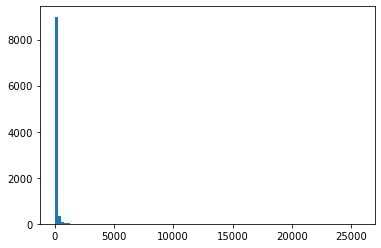

In [19]:
plt.hist(pixhistory2, bins=100);

### Q2) Generate pi

In [24]:
def plotting(n):
  x = uniform.rvs(loc=-1, scale =2, size = n)
  y = uniform.rvs(loc =-1, scale=2, size = n)
  x_accepted = []
  y_accepted = []
  x_rejected = []
  y_rejected = []

  for i in range(n):
    if x[i]**2 + y[i]**2 <1 :
      x_accepted.append(x[i])
      y_accepted.append(y[i])

    else:
      x_rejected.append(x[i])
      y_rejected.append(y[i])

  fig, axis = plt.subplots(1,1, figsize=(10,10))     
  circle = plt.Circle((0,0),1, fill=False)
  axis.plot(x_accepted, y_accepted, '.', color = 'green')
  axis.plot(x_rejected, y_rejected, 'x', color = 'red') 
  axis.set_xlim([-1.5,1.5])
  axis.set_ylim([-1.5,1.5])
  axis.add_artist(circle)
  
  pi = 4 * len (x_accepted) / n

  plt.show()
  print('pi = ', pi)
  print('n =',n)

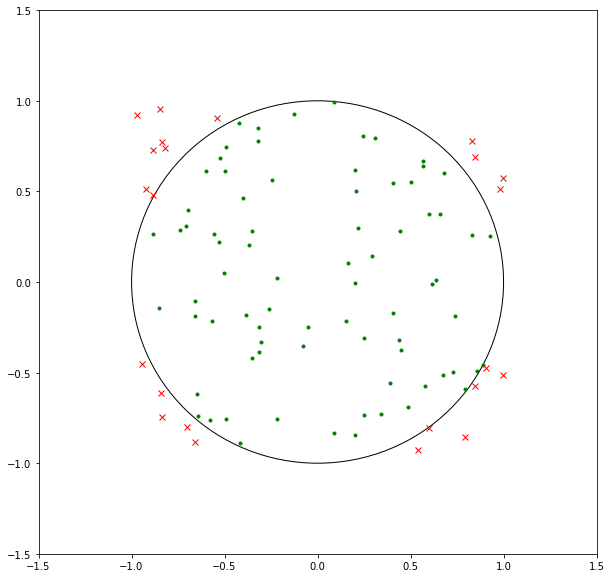

pi =  3.08
n = 100


In [25]:
plotting(100)

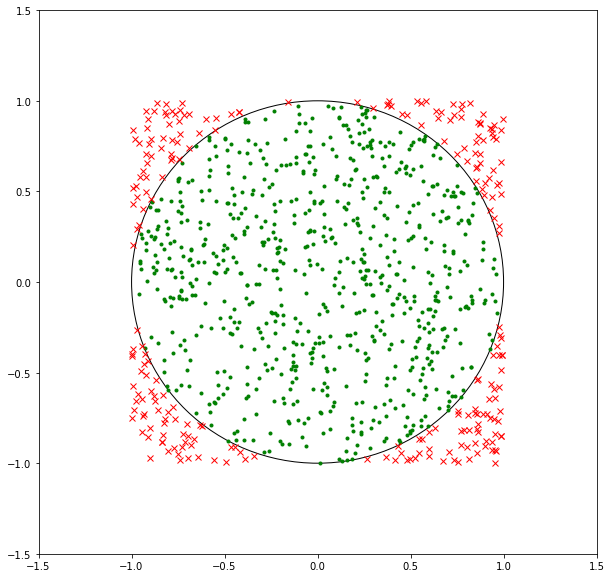

pi =  3.028
n = 1000


In [28]:
plotting(1000)

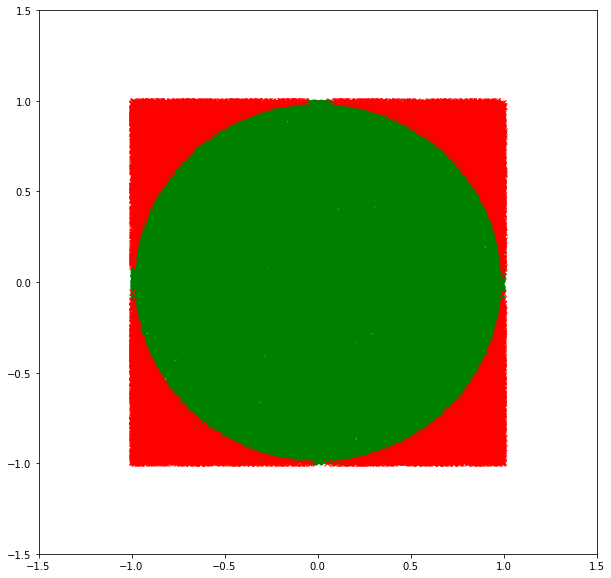

pi =  3.13904
n = 100000


In [27]:
plotting(100000)